Saving health_risk (1).csv to health_risk (1) (1).csv
🔍 Sample of Data:
         bmi  exercise_hours  junk_food_freq risk_level
0  28.730279              13               1       high
1  31.301442              12               4     medium
2  32.549043               9               0     medium
3  30.463670               2               1     medium
4  28.431755               2               1        low

🧠 Classification: Risk Level Prediction

📊 Evaluation Metrics:
Accuracy : 0.35
Precision: 0.32
Recall   : 0.30

Detailed Report:
              precision    recall  f1-score   support

         Low       0.14      0.20      0.17         5
      Medium       0.62      0.50      0.56        10
        High       0.20      0.20      0.20         5

    accuracy                           0.35        20
   macro avg       0.32      0.30      0.31        20
weighted avg       0.40      0.35      0.37        20



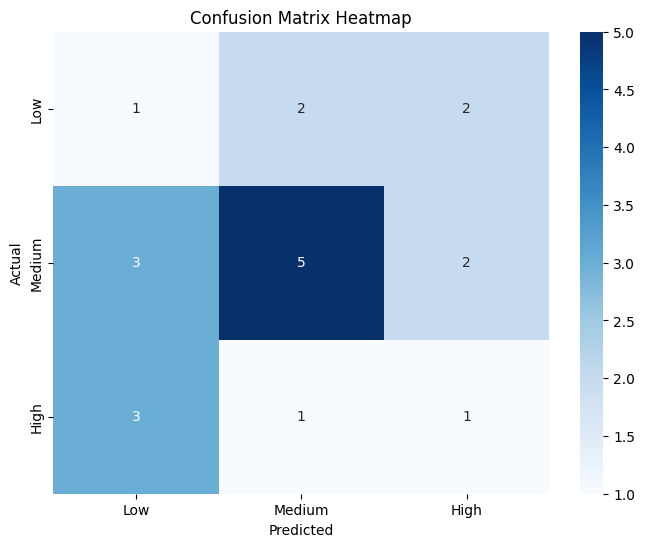


🔍 Clustering (KMeans) for Health Profile Segmentation

Silhouette Score (Cluster Quality): 0.28


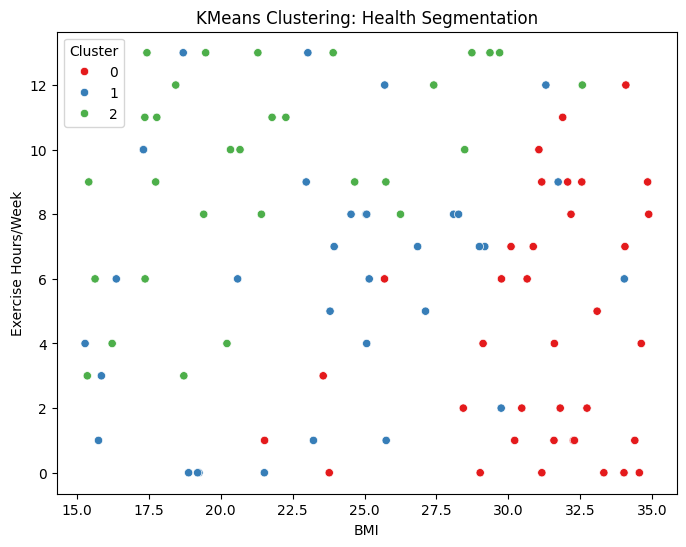

In [1]:
# === STEP 1: Import Required Libraries ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# === STEP 2: Upload and Load Dataset ===
from google.colab import files
uploaded = files.upload()

# Automatically pick the uploaded file
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

# === STEP 3: Show First Few Rows ===
print("🔍 Sample of Data:")
print(df.head())

# === STEP 4: Classification (Supervised Learning) ===
print("\n🧠 Classification: Risk Level Prediction")

# Convert risk_level to numerical: low=0, medium=1, high=2
df['risk_level'] = df['risk_level'].map({'low': 0, 'medium': 1, 'high': 2})

# Features and target
X = df[['bmi', 'exercise_hours', 'junk_food_freq']]
y = df['risk_level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)

print("\n📊 Evaluation Metrics:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print("\nDetailed Report:")
print(classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Low", "Medium", "High"],
            yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# === STEP 5: Clustering (Unsupervised Learning) ===
print("\n🔍 Clustering (KMeans) for Health Profile Segmentation")

# Remove target column for clustering
X_cluster = df[['bmi', 'exercise_hours', 'junk_food_freq']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Apply KMeans clustering (let's try 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['cluster'] = clusters

# Evaluate clustering
sil_score = silhouette_score(X_scaled, clusters)
print(f"\nSilhouette Score (Cluster Quality): {sil_score:.2f}")

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['bmi'], y=df['exercise_hours'], hue=clusters, palette='Set1')
plt.title("KMeans Clustering: Health Segmentation")
plt.xlabel("BMI")
plt.ylabel("Exercise Hours/Week")
plt.legend(title="Cluster")
plt.show()
